# Prediction player skill in Team mode

###  Import Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

### Check Library Version

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Import Dataset

In [3]:
# Read in Data set
df= pd.read_csv('D:PUBG_team_dataset.csv')

In [4]:
df.shape

(923320, 29)

In [5]:
df.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_duo,matchType_duo-fpp,matchType_squad,matchType_squad-fpp
0,-0.396459,-0.644886,-0.612275,-0.573603,-0.37566,-0.510597,84,1437,-0.592435,-0.764271,...,-0.143015,-0.085198,-0.847137,-1.080382,1525,0.0667,0,0,0,1
1,-0.396459,-0.644886,-0.549299,-0.573603,-0.37566,-0.510597,57,1225,-0.592435,-0.764271,...,-0.143015,-0.085198,0.646538,1.356856,1516,0.5862,0,0,0,1
2,-0.396459,-0.644886,-0.763757,-0.573603,-0.37566,-0.510597,56,1286,-0.592435,-0.764271,...,-0.143015,-0.085198,-0.942243,-1.486589,1515,0.5556,0,0,0,1
3,-0.396459,0.520582,1.214914,1.171563,-0.37566,5.078455,6,0,1.968032,2.041160,...,-0.143015,-0.085198,0.585665,0.544443,0,0.7174,1,0,0,0
4,2.996806,-0.062152,0.584567,1.171563,-0.37566,-0.137993,8,0,1.327915,2.041160,...,-0.143015,-0.085198,2.221631,0.544443,0,0.8387,0,0,0,1


In [6]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'matchType_duo', 'matchType_duo-fpp', 'matchType_squad',
       'matchType_squad-fpp'],
      dtype='object')

# Model Building

### Linear Regression is a useful tool for predicting a quantitative response.
**Prediction using:**
1. Multiple Linear Regression
2. Polynomial Regression

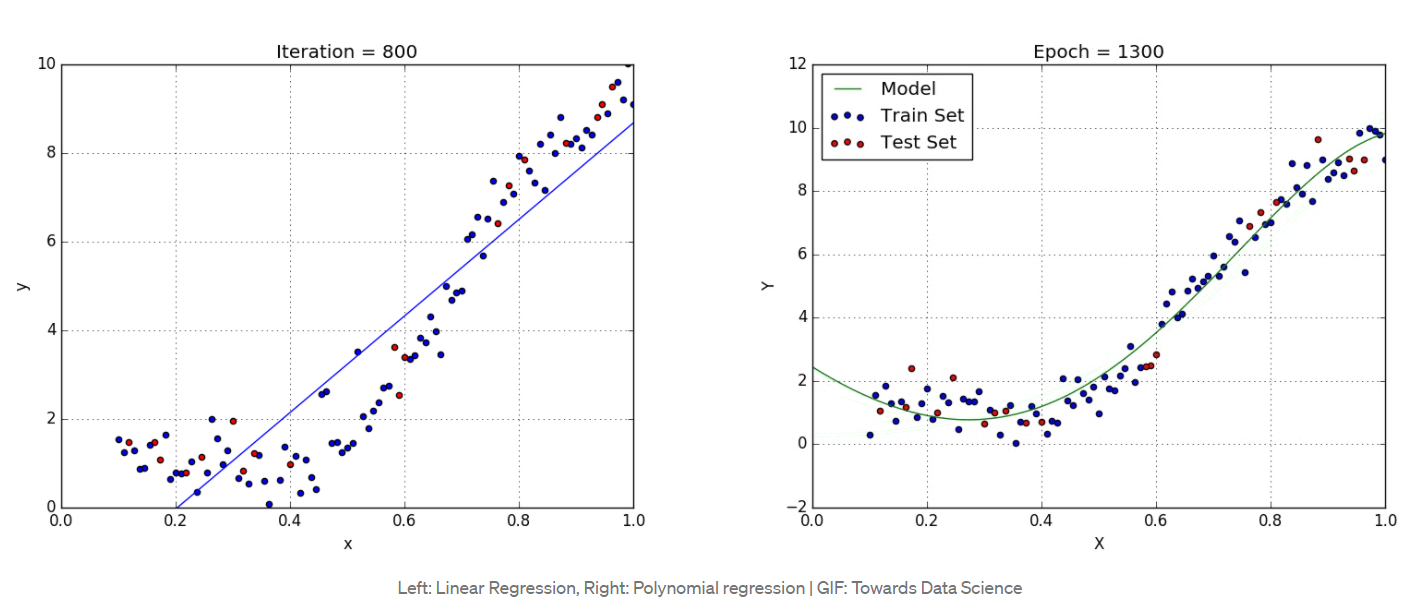

## 1. Multiple Linear Regression 

**Multiple linear regression** has one y and two or more x variables. It is an extension of Simple Linear regression
as it takes more than one predictor variable to predict the response variable.

**Multiple Linear Regression** is one of the important regression algorithms which models the linear relationship
between a single dependent continuous variable and more than one independent variable.

**Assumptions for Multiple Linear Regression:**
1. A linear relationship should exist between the Target and predictor variables.
2. The regression residuals must be normally distributed.
3. MLR assumes little or no multicollinearity (correlation between the independent variable) in data.

**Formula:**
Y = β0 + β1X1 + β2X2 + β3X3 + ... + βnXn + e

Y = Dependent variable / Target variable

β0 = Intercept of the regression line

β1, β2,..βn = Slope of the regression lime which tells whether the line is increasing or decreasing

X1, X2,..Xn = Independent variables / Predictor variables**

e = Error


### 1. Training a Linear Regression Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [8]:
X = df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_duo', 'matchType_duo-fpp', 'matchType_squad',
       'matchType_squad-fpp'
       ]]
y = df['winPlacePerc']

### 2. Train and Test split

In [9]:
# Train dataset 70% and Test dataset 30%./ use random state at 0.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

### 3. Creating and Training the Model

In [11]:
model_mr = LinearRegression()
model_mr

LinearRegression()

In [12]:
# fit model to training set
model_mr.fit(X_train,y_train)

LinearRegression()

### 4. Model Evaluation

r_sq = model_mr.score(X_train,y_train)
print('Coefficient of determination(R2_score):', r_sq)

In [13]:
print('intercept:', model_mr.intercept_)

intercept: 0.821846648590663


In [14]:
print('slope:', model_mr.coef_)

slope: [ 6.56204218e-03  2.58904762e-02  1.81598513e-02 -1.72439700e-02
  7.92469105e-05  1.38465835e-03 -7.42178693e-03 -4.53661356e-05
 -1.64559131e-02 -1.05047595e-01  1.02541534e-03 -4.16232123e-02
  6.78747196e-02  1.52841989e-01  8.16060470e-02  5.27508370e-03
  2.67980474e-02 -8.40619057e-06  3.19476588e-03 -2.05812423e-03
  5.96638671e-04  1.31553112e-01  2.67172164e-02  1.46060410e-04
 -7.05836105e-02 -6.79806496e-02  6.21773744e-02  7.63868856e-02]


In [15]:
coeff_df = pd.DataFrame(model_mr.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
assists,0.006562
boosts,0.025890
damageDealt,0.018160
DBNOs,-0.017244
headshotKills,0.000079
heals,0.001385
killPlace,-0.007422
killPoints,-0.000045
kills,-0.016456
killStreaks,-0.105048


### Predictions from our Model

In [16]:
pred_mr = model_mr.predict(X_test)

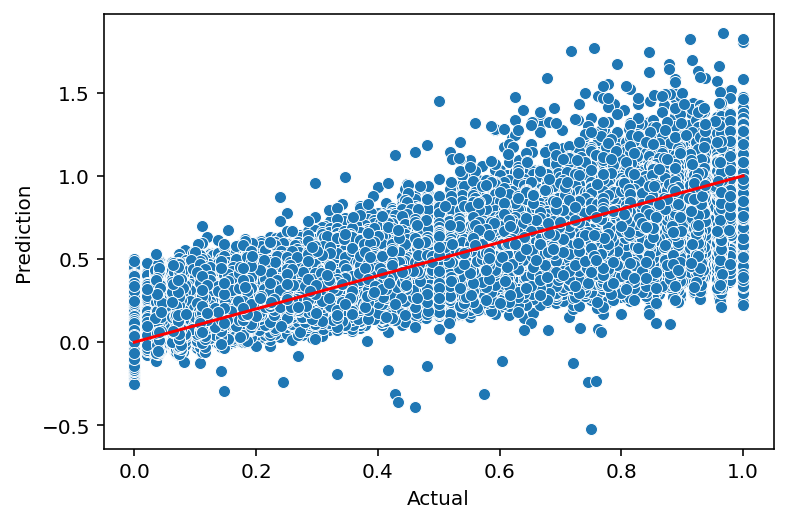

In [17]:
# plot predictions against actual
plot_k = sns.scatterplot(y_test,pred_mr)
plot_k.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,1,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### Prediction sample, one in X_test

Actual winPlacePerc 0.8929
Predicted winPlacePer 1.0154558844414883


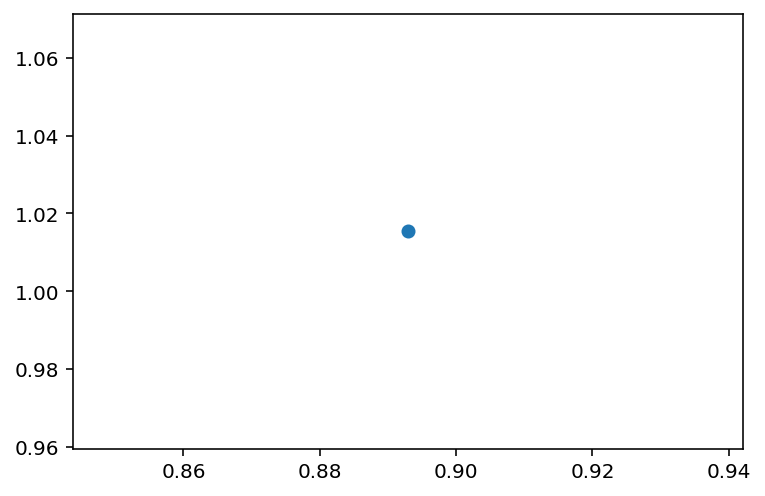

In [18]:
# input : X_test.loc[[random sample for prediction test]]
    
y_pred_test = model_mr.predict(X_test[[15]])

plt.scatter(y_test[[15]],  y_pred_test)
print( "Actual winPlacePerc",float(y_test[[15]] ) )
print( "Predicted winPlacePer", float( y_pred_test))

In [19]:
y_test

array([0.    , 1.    , 0.2083, ..., 0.7586, 0.1818, 0.9167])

**Residual Histogram**

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true.

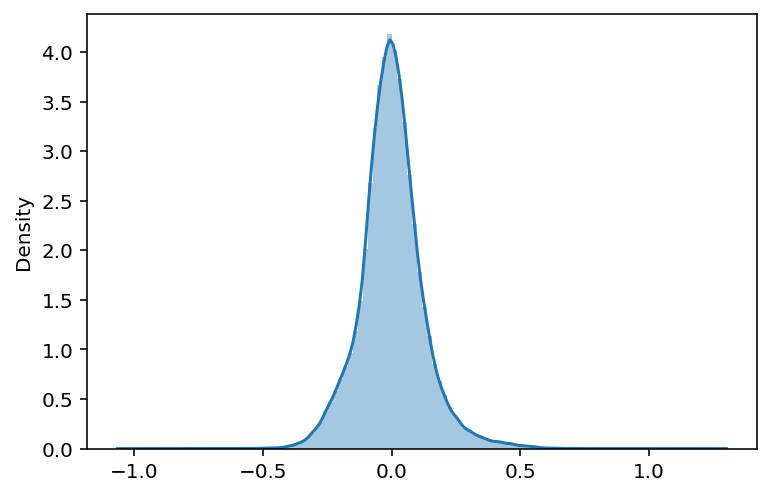

In [20]:
sns.distplot((y_test-pred_mr),bins=120);

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [21]:
print('R squared of Training Set: {:.2f}'.format(model_mr.score(X_train,y_train)*100))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, pred_mr)))
print('Mean Squared Error (MSE): {:.4f}'.format(metrics.mean_squared_error(y_test, pred_mr)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred_mr))))

R squared of Training Set: 83.90
Mean Absolute Error (MAE): 0.0909
Mean Squared Error (MSE): 0.0153
Root Mean Squared Error (RMSE): 0.1238


### Random sample test: Actual value vs Predicted value

In [40]:
#Actual value and the predicted value
mr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_mr})
mr_diff.tail(12)

,Actual value,Predicted value
276984,0.0444,0.180003
276985,0.0000,-0.064877
276986,0.5600,0.581938
276987,0.8214,1.012027
276988,0.1481,0.117600
276989,0.0213,0.321741
276990,0.5000,0.569628
276991,0.5217,0.590797
276992,0.8542,0.937225
276993,0.7586,0.753595


In [23]:
#Actual value and the predicted value
mr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_mr})
mr_diff["%diff"] = ((((mr_diff["Predicted value"]) - mr_diff["Actual value"])/mr_diff["Predicted value"]) *100).round(2)

mr_diff.head(21)

,Actual value,Predicted value,%diff
0,0.0000,-0.026343,100.00
1,1.0000,0.909144,-9.99
2,0.2083,0.395126,47.28
3,0.0667,0.136199,51.03
4,0.4516,0.527319,14.36
5,0.0000,0.007002,100.00
6,0.9655,0.787906,-22.54
7,0.2963,0.361811,18.11
8,0.4583,0.264278,-73.42
9,0.2000,0.303359,34.07


In [24]:
mr_diff.describe().round(3)

,Actual value,Predicted value,%diff
count,276996.000,276996.000,276996.000
mean,0.470,0.469,2.175
std,0.309,0.283,913.869
min,0.000,-0.521,-254549.020
25%,0.192,0.243,-14.530
50%,0.448,0.441,1.860
75%,0.741,0.698,22.000
max,1.000,1.856,118951.920


## 2. Polynomial Regression

**Polynomial regression** is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.

In a curvilinear relationship, the value of the target variable changes in a non-uniform manner with respect to the predictor (s).

**In polynomial regression**, we have a polynomial equation of degree n represented as:

**Formula:**
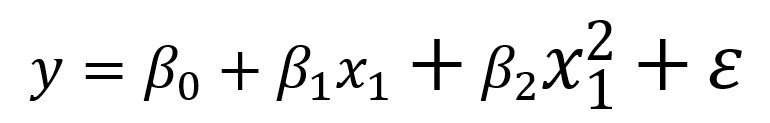

Y = Dependent variable / Target variable

β0 = Intercept of the regression line

β1, β2,..βn = Slope of the regression lime which tells whether the line is increasing or decreasing

X1, X2,..Xn = Independent variables / Predictor variables**

e = Error

The number of higher-order terms increases with the increasing value of n, and hence the equation becomes more complicated.



###  Creating and Training the Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# Trasformation in function polynomial with using degree=2 good fitting.
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

In [27]:
model_pr = LinearRegression().fit(X_train_poly, y_train)

### Model Evaluation

In [28]:
r_sq = model_pr.score(X_train_poly, y_train)
print('coefficient of determination(R_squar_score):', r_sq)

coefficient of determination(R_squar_score): 0.9125599673693954


In [29]:
print('intercept:', model_pr.intercept_)

intercept: 1.139614216578942


In [30]:
print('coefficients:', model_pr.coef_)

coefficients: [ 8.48397281e-03  1.92331647e-02  2.06519978e-02 -1.37910532e-02
  6.31512103e-03  4.73261250e-03 -1.68633307e-02  1.75690612e-03
 -1.64915206e-01 -7.21901050e-02  3.88147990e-04 -4.68273126e-02
 -2.91937456e-02  2.35801229e-01  1.96021066e-01  5.16606159e-03
  2.63473437e-02  5.54860099e-04  2.12392879e-03 -2.04202210e-03
 -9.84972043e-04  1.20071176e-01  1.97215727e-02 -4.93538921e-03
 -3.54678723e-02 -2.68453957e-02  2.58692925e-02  3.64439756e-02
 -4.05535451e-04 -6.38187113e-04 -2.89715006e-04  6.11997100e-04
 -4.49455299e-05 -1.50948145e-04 -8.28355045e-05 -5.14318781e-07
  3.28748035e-04 -5.27386242e-04  2.66988054e-04  1.00504015e-03
 -3.48983886e-03 -2.45164301e-03 -1.02173494e-03 -4.28199850e-04
 -2.81469408e-04  3.89550063e-04 -1.77053227e-04 -9.63839204e-05
  3.80828963e-05 -8.21237853e-04  8.79288425e-05 -1.34842423e-06
  3.37272721e-03  3.20392563e-03  1.30810228e-03  5.99217693e-04
  3.65333206e-04 -5.89755157e-05  6.47986503e-04 -3.73157773e-04
 -1.1097716

### Predictions from our Model

In [31]:
pred_pr = model_pr.predict(X_test_poly)
print('predicted response:', pred_pr, sep='\n')

predicted response:
[-0.02383692  0.82147041  0.43901605 ...  0.8160107   0.32112213
  0.94924405]


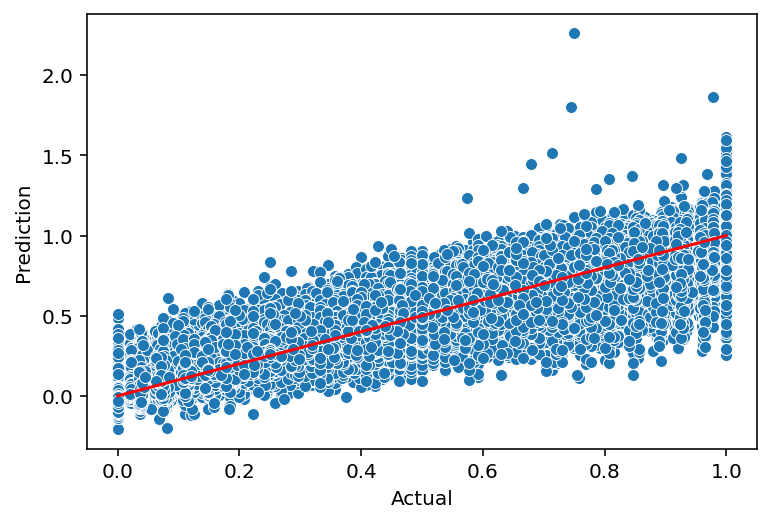

In [32]:
# plot predictions against actual
plot_k = sns.scatterplot(y_test,pred_pr)
plot_k.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,1,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### Prediction sample, one in X_test

Actual winPlacePerc 0.8929
Predicted winPlacePer 0.9624405420315328


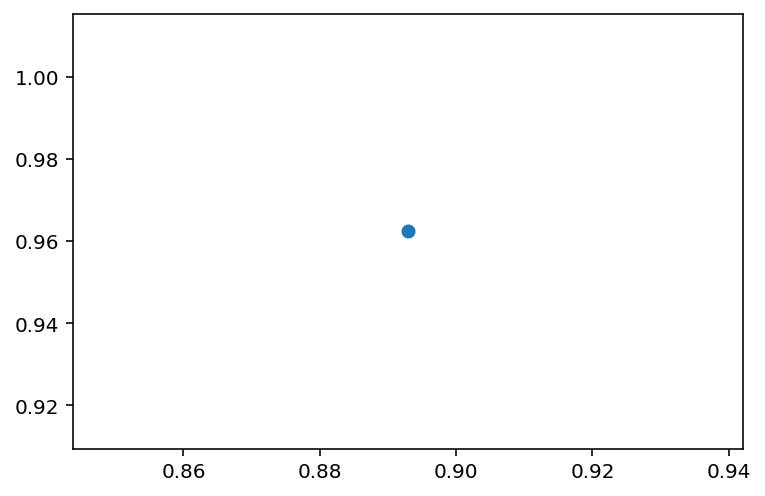

In [33]:
# input : X_test_poly[[random sample for prediction test]]
    
y_pred_test = model_pr.predict(X_test_poly[[15]])

plt.scatter(y_test[[15]], y_pred_test)
print( "Actual winPlacePerc",float(y_test[[15]]))
print( "Predicted winPlacePer", float(y_pred_test))

**Residual Histogram**

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true.

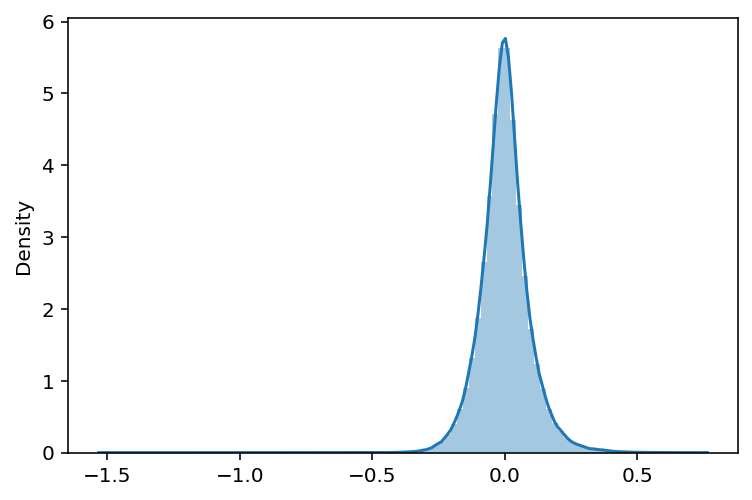

In [34]:
sns.distplot((y_test-pred_pr),bins=100);

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [35]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(model_pr.score(X_train_poly,y_train)*100))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, pred_pr)))
print('Mean Squared Error (MSE): {:.4f}'.format(metrics.mean_squared_error(y_test, pred_pr)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred_pr))))

R squared of Training Set: 91.26
Mean Absolute Error (MAE): 0.0670
Mean Squared Error (MSE): 0.0084
Root Mean Squared Error (RMSE): 0.0914


### Random sample test: Actual value vs Predicted value

In [39]:
#Actual value and the predicted value
pr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_pr})
pr_diff.tail(12)

,Actual value,Predicted value
276984,0.0444,0.119676
276985,0.0000,-0.029870
276986,0.5600,0.598144
276987,0.8214,0.818283
276988,0.1481,0.158649
276989,0.0213,0.210594
276990,0.5000,0.493031
276991,0.5217,0.581443
276992,0.8542,0.853486
276993,0.7586,0.816011


In [37]:
#Actual value and the predicted value
pr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_pr})
pr_diff["%diff"] = ((((pr_diff["Predicted value"]) - pr_diff["Actual value"])/pr_diff["Predicted value"]) *100).round(2)

pr_diff.head(21)

,Actual value,Predicted value,%diff
0,0.0000,-0.023837,100.00
1,1.0000,0.821470,-21.73
2,0.2083,0.439016,52.55
3,0.0667,0.143565,53.54
4,0.4516,0.556327,18.82
5,0.0000,-0.030517,100.00
6,0.9655,0.806645,-19.69
7,0.2963,0.373014,20.57
8,0.4583,0.383585,-19.48
9,0.2000,0.307172,34.89


In [38]:
pr_diff.describe().round(3)

,Actual value,Predicted value,%diff
count,276996.000,276996.000,276996.000
mean,0.470,0.469,-8.525
std,0.309,0.295,6719.087
min,0.000,-0.205,-3273457.630
25%,0.192,0.218,-10.810
50%,0.448,0.452,1.830
75%,0.741,0.726,16.080
max,1.000,2.260,507908.390
